In [2]:
%load_ext autoreload
%autoreload 2
import os
import pickle as pkl
from os.path import join as oj

import dvu
import matplotlib as mpl
import matplotlib.pyplot as plt
from math import ceil
from tqdm import tqdm
import traceback
import numpy as np
import matplotlib.patches as patches
import sys
sys.path.append('../..')

mpl.rcParams['figure.dpi'] = 250
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

# change working directory to project root
if os.getcwd().split('/')[-1] == 'notebooks':
    os.chdir('../..')
from config.saps.datasets import DATASETS_CLASSIFICATION, DATASETS_REGRESSION
from util import DATASET_PATH
from viz import *
import viz
RESULTS_PATH = oj(os.path.dirname(DATASET_PATH), 'results')

print('num_datasets', len(DATASETS_CLASSIFICATION), len(DATASETS_REGRESSION))

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
num_datasets 11 9


In [3]:
# run comparison aggregations
!python3 "../../02_aggregate_comparisons.py"

	processing path /Users/chandan/rules/imodels-experiments/results/reg_data/credit/train-test
	processing path /Users/chandan/rules/imodels-experiments/results/reg_data/ionosphere/train-test
	processing path /Users/chandan/rules/imodels-experiments/results/reg_data/german-credit/train-test
	processing path /Users/chandan/rules/imodels-experiments/results/reg_data/juvenile/train-test
	processing path /Users/chandan/rules/imodels-experiments/results/reg_data/satellite-image/train-test
../../02_aggregate_comparisons.py:50: UserWarning: bad complexity range
  warnings.warn(f'bad complexity range')
	processing path /Users/chandan/rules/imodels-experiments/results/reg_data/echo-months/train-test
	processing path /Users/chandan/rules/imodels-experiments/results/reg_data/abalone/train-test
	processing path /Users/chandan/rules/imodels-experiments/results/reg_data/heart/train-test
	processing path /Users/chandan/rules/imodels-experiments/results/reg_data/breast-tumor/train-test
	processing path 

# overarching plots

In [4]:
def make_comparison_grid(metric='rocauc', num_dsets=7, datasets=DATASETS_CLASSIFICATION,
                    models_to_include=['SAPS', 'CART'], save_name='fig'):
    R, C = ceil(num_dsets / 3), 3
    plt.figure(figsize=(3 * C, 2.5 * R), facecolor='w')
    
    COLORS = {
        'SAPS': 'black',
        'CART': 'orange', # cp,
        'Rulefit': 'green',
        'C45': cb,
        'CART_(MSE)': 'orange',
        'CART_(MAE)': cg,
        'SAPS_(Reweighted)': cg,
        'SAPS_(Include_Linear)': cb,
        'Random_Forest': cg,
        'Gradient_Boosting': cb,
    }
    
    for i, dset in enumerate(tqdm(datasets[::-1][:num_dsets])):
        try:
            dset_name = dset[0]
    #         try:
            ax = plt.subplot(R, C, i + 1)
            pkl_file = oj(RESULTS_PATH, 'reg_data', dset_name, 'train-test/combined.pkl')
            df = pkl.load(open(pkl_file, 'rb'))['df']
            df['model'] = df.index
            for _, (name, g) in enumerate(df.groupby('model')):
                if name in models_to_include:
                    x = g[f'{dset_name}_complexity']
                    args = np.argsort(x)
    #                 if i % C == C - 1:
    #                     for cutoff in args:
    #                         if args[cutoff] >= 20:
    #                             break
    #                     args = args[:cutoff - 1]
                    alpha = 1.0 if 'SAPS' == name else 0.35
                    lw = 2 if 'SAPS' == name else 1.5
                    kwargs = dict(color=COLORS[name], alpha=alpha, lw=lw)
    #                 print(g.keys())
                    plt.plot(x[args],
                             g[f'{dset_name}_{metric}_test'][args], '.-', **kwargs,
                             label=name.replace('_', ' ').replace('C45', 'C4.5'), zorder=-5)
        #             plt.plot(g[f'{dset_name}_complexity'][args], g[f'{dset_name}_{metric}_train'][args], '.--', **kwargs,
        #                      label=name + ' (Train)')
                    plt.xlabel('Number of rules')
                    # plt.xlim((0, 20))
                    plt.ylabel(dset_name.capitalize().replace('-', ' ') + ' ' + metric.upper().replace('ROC', '').replace('R2', '$R^2$'))
                    plt.xscale('log')
    #         if i % C == C - 1:
            if i % C == C - 1:
                # rect = patches.Rectangle((18, 0), 100, 1, linewidth=1, edgecolor='w', facecolor='w', zorder=-4)
                dvu.line_legend(fontsize=10, xoffset_spacing=0.1, adjust_text_labels=True)
                # ax.add_patch(rect)
        except:
            print('skipping', dset_name)
            traceback.print_exc()
    viz.savefig(save_name)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:03<00:00,  3.44it/s]


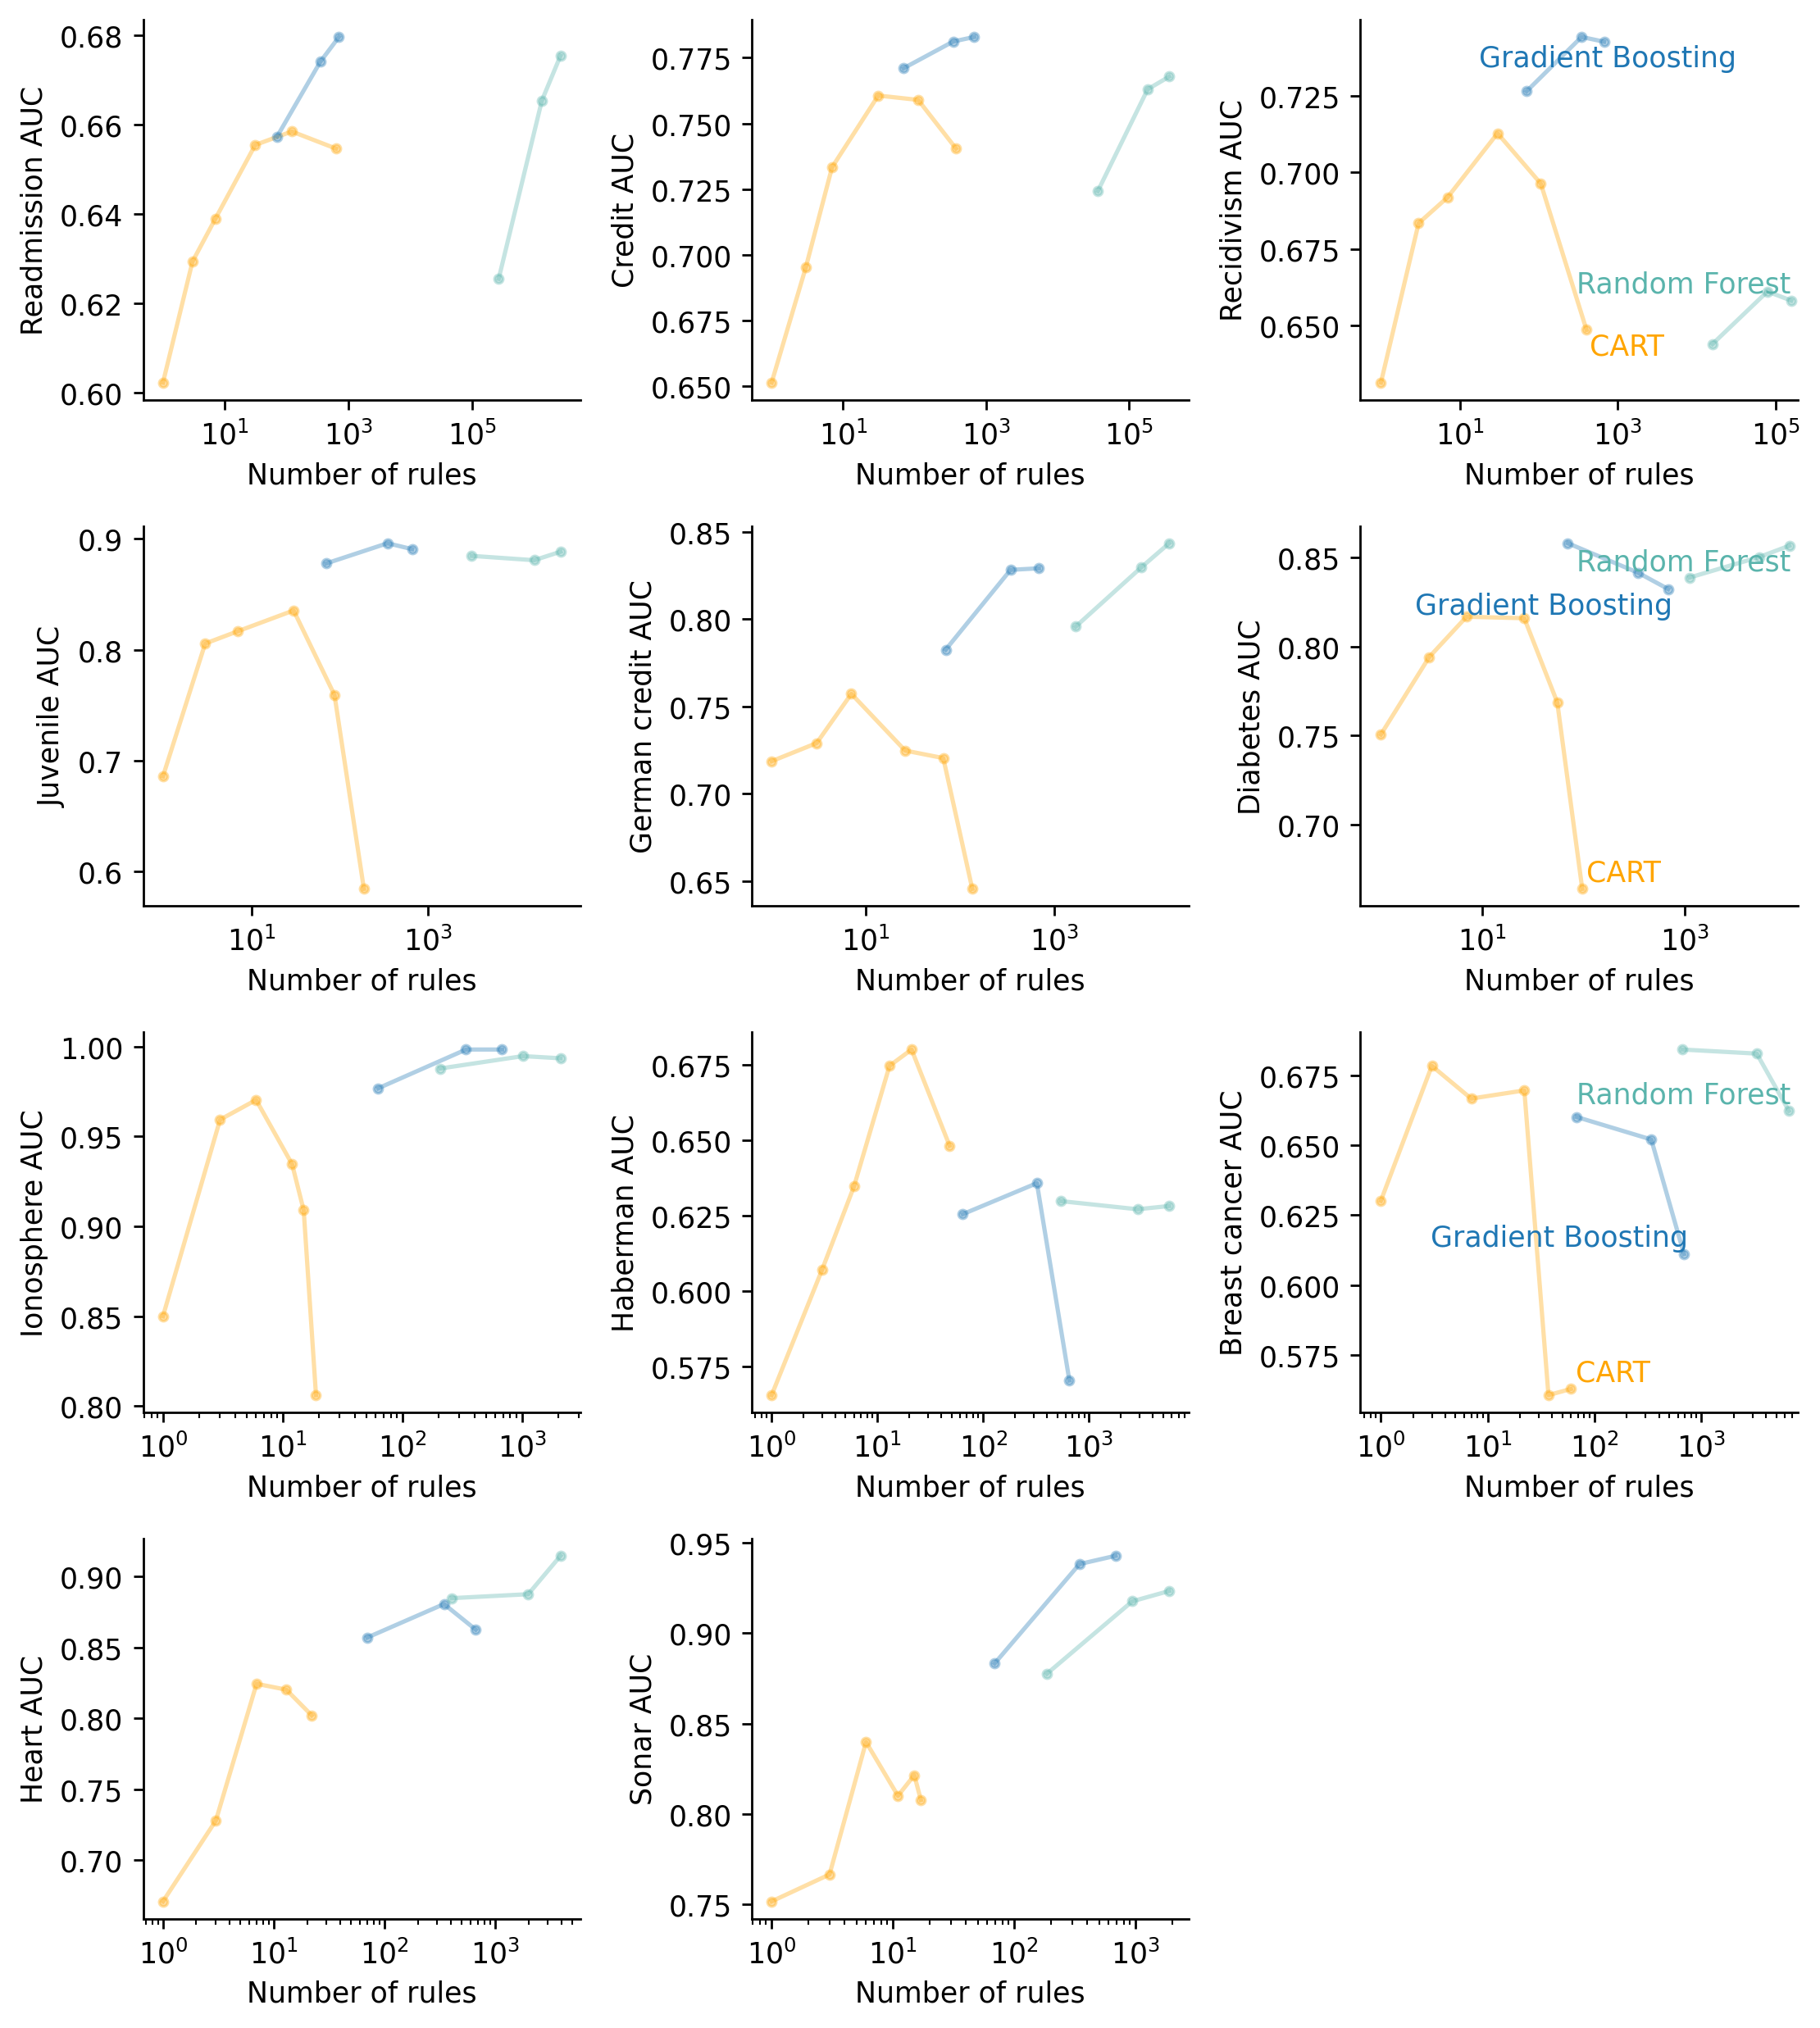

In [5]:
make_comparison_grid(metric='rocauc', num_dsets=len(DATASETS_CLASSIFICATION), datasets=DATASETS_CLASSIFICATION,
                models_to_include=['CART', 'Random_Forest', 'Gradient_Boosting'],
                save_name='shrinkage-classification')

  0%|          | 0/9 [00:00<?, ?it/s]Traceback (most recent call last):
  File "/var/folders/01/fl5q4n5547v1g4z0hw_v_mrc0000gn/T/ipykernel_22580/2295746429.py", line 25, in make_comparison_grid
    df = pkl.load(open(pkl_file, 'rb'))['df']
FileNotFoundError: [Errno 2] No such file or directory: '/Users/chandan/rules/saps-experiments/results/reg_data/breast-tumor/train-test/combined.pkl'
 11%|█         | 1/9 [00:00<00:01,  7.81it/s]Traceback (most recent call last):
  File "/var/folders/01/fl5q4n5547v1g4z0hw_v_mrc0000gn/T/ipykernel_22580/2295746429.py", line 25, in make_comparison_grid
    df = pkl.load(open(pkl_file, 'rb'))['df']
FileNotFoundError: [Errno 2] No such file or directory: '/Users/chandan/rules/saps-experiments/results/reg_data/echo-months/train-test/combined.pkl'
Traceback (most recent call last):
  File "/var/folders/01/fl5q4n5547v1g4z0hw_v_mrc0000gn/T/ipykernel_22580/2295746429.py", line 25, in make_comparison_grid
    df = pkl.load(open(pkl_file, 'rb'))['df']
FileNotFou

skipping breast-tumor
skipping echo-months
skipping satellite-image
skipping california-housing
skipping diabetes-regr
skipping abalone
skipping friedman3
skipping friedman2
skipping friedman1


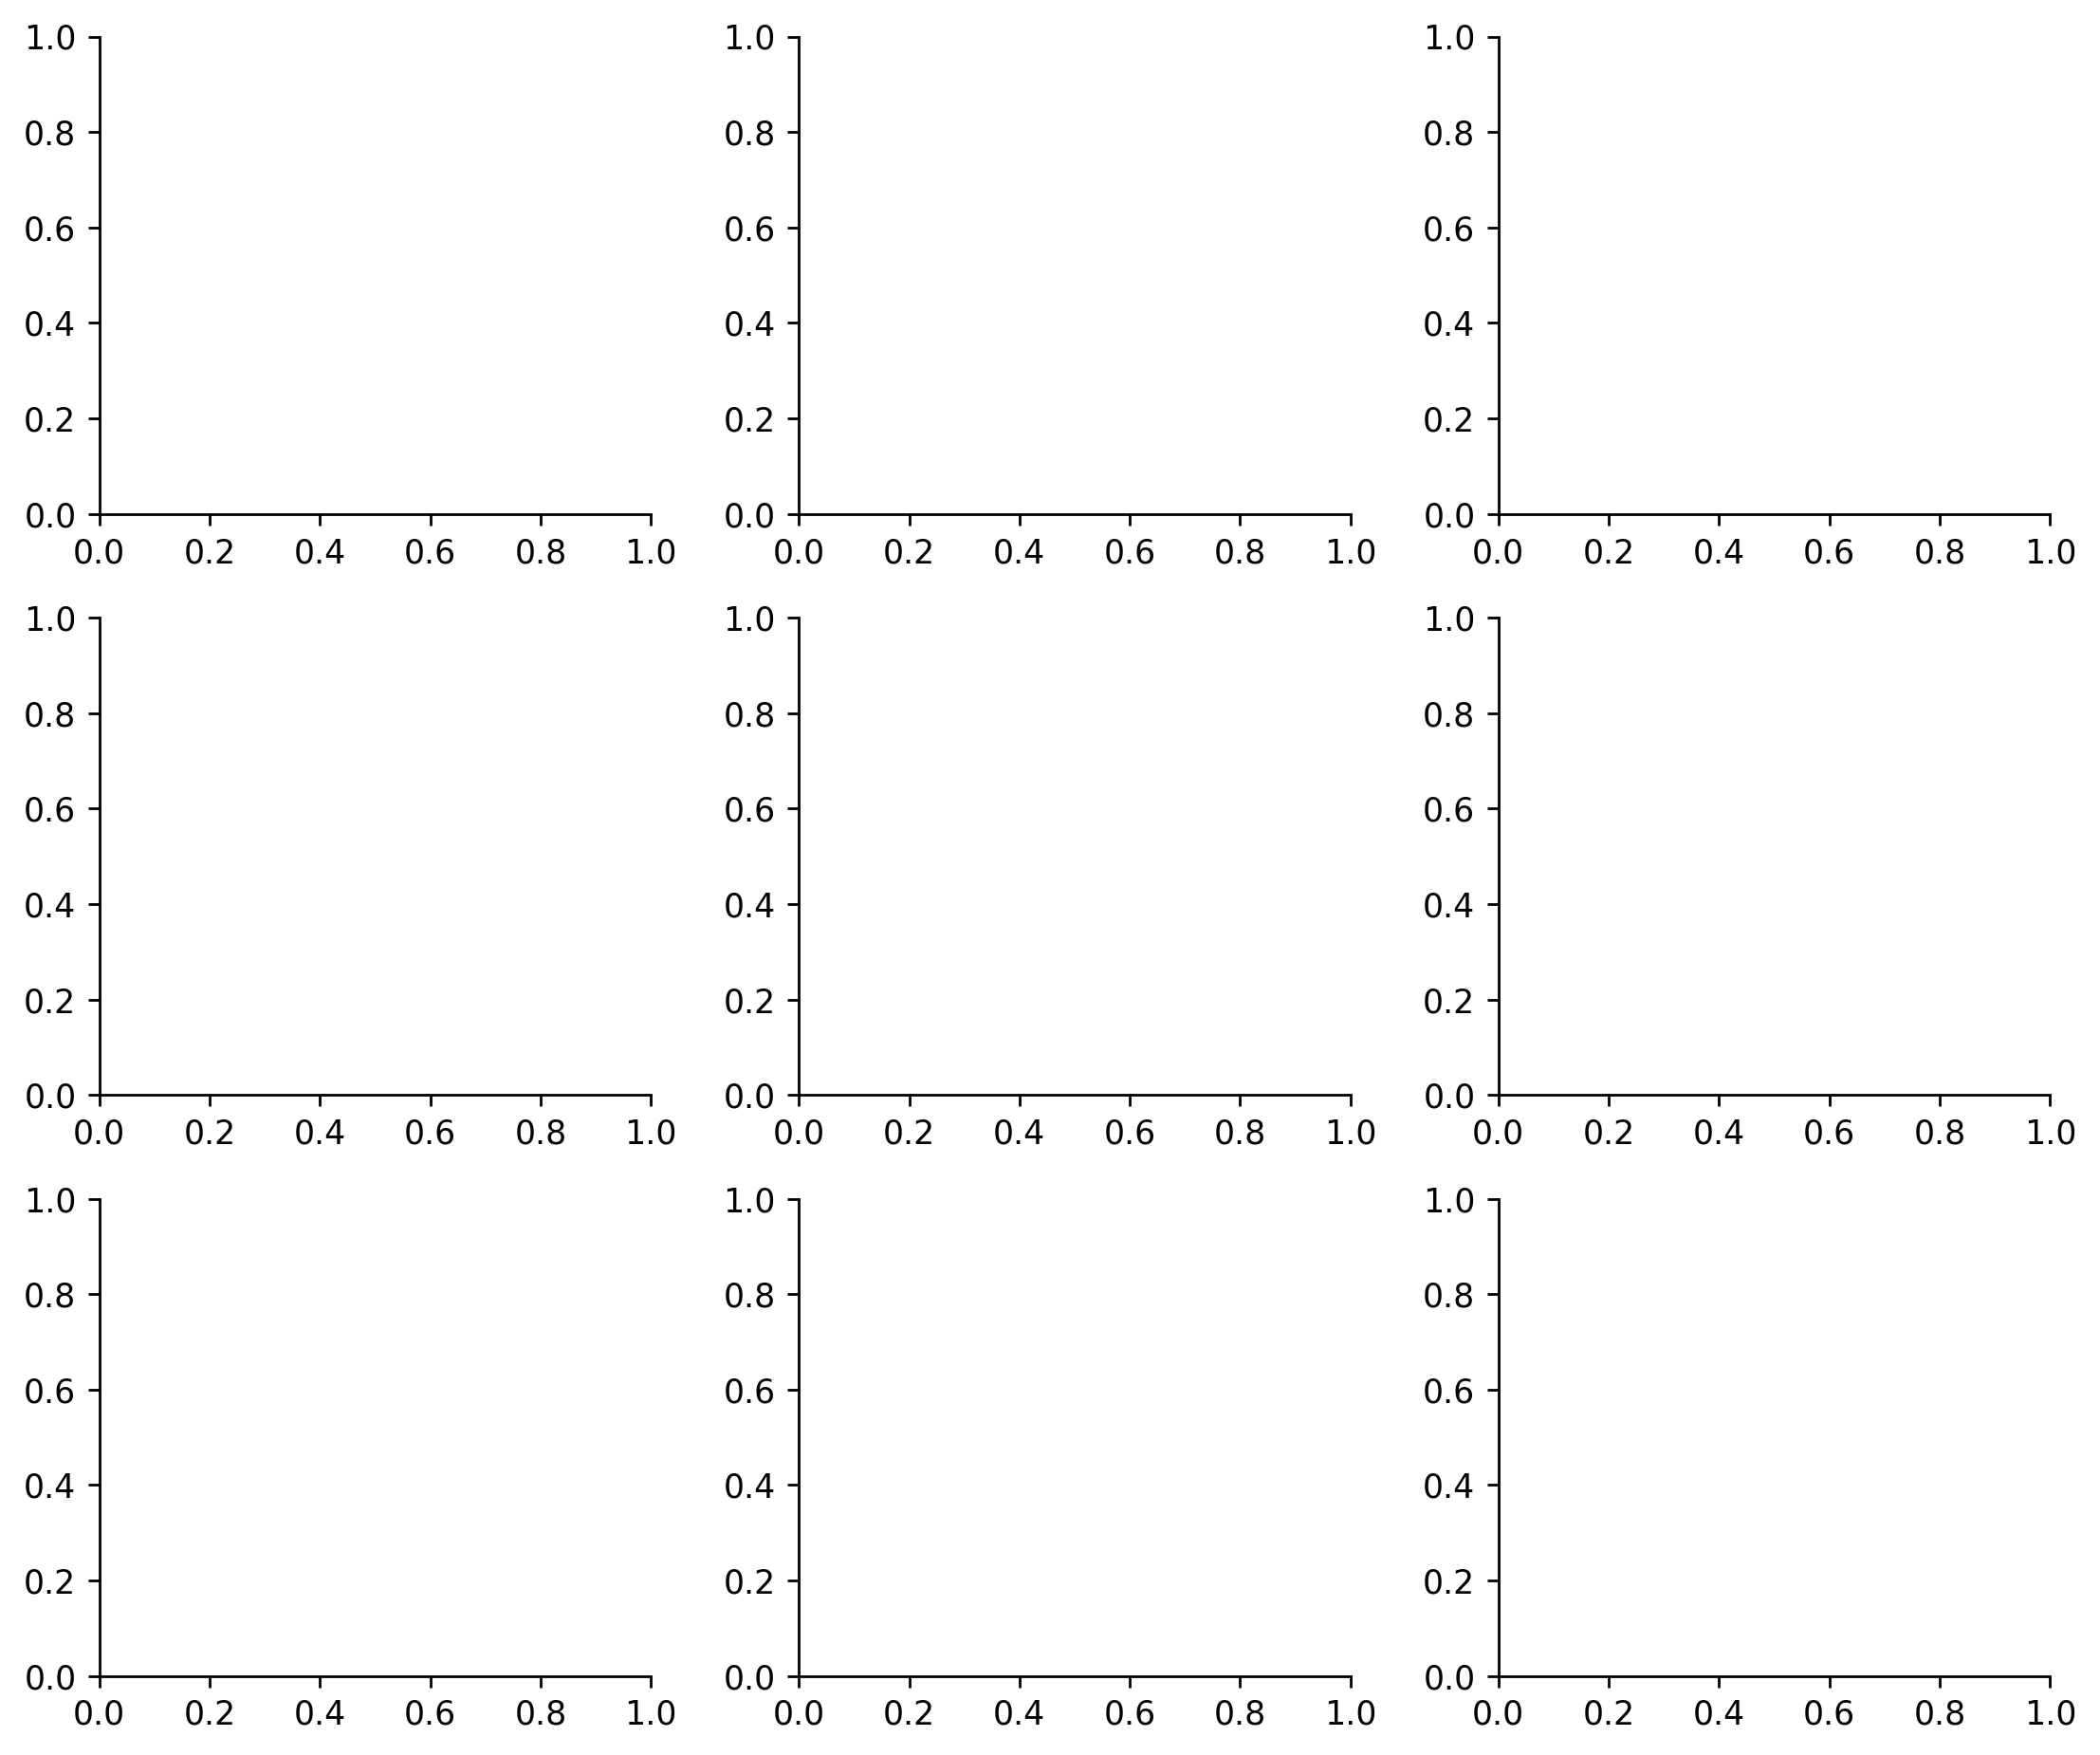

In [39]:
make_comparison_grid(metric='r2', num_dsets=len(DATASETS_REGRESSION), datasets=DATASETS_REGRESSION,
                models_to_include=['CART_(MSE)', 'CART_(MAE)', 'Random_Forest', 'Gradient_Boosting'],
                save_name='shrinkage-regression')

# deprecated 

In [ ]:


########################### DEPRECATED ############################


metric = 'rocauc'
for dset in DATASETS_CLASSIFICATION:
    dset_name = dset[0]
    try:
        pkl_file = oj('../results', 'reg_data', dset_name, 'train-test/combined.pkl')
        df = pkl.load(open(pkl_file, 'rb'))['df']
        df['model'] = df.index

        #     print(list(df.keys()))
        plt.figure(figsize=(6, 4))
        #     R, C = 1, 2
        for i, (name, g) in enumerate(df.groupby('model')):
            args = np.argsort(g[f'{dset_name}_complexity'])
            plt.title(dset_name.capitalize())
            alpha = 1.0 if 'saps' in dset_name else 0.5            
            kwargs = dict(color=colors[i], alpha=alpha)            

            plt.plot(g[f'{dset_name}_complexity'][args], g[f'{dset_name}_{metric}_test'][args], '.-', **kwargs,
                     label=name + ' (Test)')
#             plt.plot(g[f'{dset_name}_complexity'][args], g[f'{dset_name}_{metric}_train'][args], '.--', **kwargs,
#                      label=name + ' (Train)')
            plt.xlabel('Complexity (basically number of rules)')
            plt.xlim((0, 25))
            plt.ylabel('AUC')
            dvu.line_legend(fontsize=10, xoffset_spacing=0.05, adjust_text_labels=False)
        plt.show()
    except:
        print('skipping', dset_name)

# regression

In [55]:
df.keys()

Index(['max_rules', 'friedman1_r2_train', 'friedman1_explained_variance_train',
       'friedman1_neg_mean_squared_error_train', 'friedman1_r2_test',
       'friedman1_explained_variance_test',
       'friedman1_neg_mean_squared_error_test', 'friedman1_complexity',
       'friedman1_time', 'mean_r2', 'mean_explained_variance',
       'mean_neg_mean_squared_error', 'mean_complexity', 'mean_time',
       'max_depth', 'posthoc_ridge', 'include_linear', 'n_estimators',
       'model'],
      dtype='object')

In [ ]:
metric = 'mse'
for dset in DATASETS_REGRESSION:
    dset_name = dset[0]
    pkl_file = oj('../results', 'reg_data', dset_name, 'train-test/combined.pkl')
    df = pkl.load(open(pkl_file, 'rb'))['df']
    df['model'] = df.index

    plt.figure(figsize=(6, 4))
    #     R, C = 1, 2
    for i, (name, g) in enumerate(df.groupby('model')):
        args = np.argsort(g[f'{dset_name}_complexity'])
        plt.title(dset_name.capitalize())
        kwargs = dict(color=colors[i])
        plt.plot(g[f'{dset_name}_complexity'][args], g[f'{dset_name}_{metric}_test'][args], '.-', **kwargs,
                 label=name + ' (Test)')
#         plt.plot(g[f'{dset_name}_complexity'][args], g[f'{dset_name}_{metric}_train'][args], '.--', **kwargs,
#                  label=name + ' (Train)')
        plt.xlabel('Complexity (basically number of rules)')
        #         plt.xlim((0, 25))
        plt.ylabel('R2')
        dvu.line_legend(fontsize=10, xoffset_spacing=0.05, adjust_text_labels=False)